# COMORBUSS - Baseline

  This file explains the code necessary to make a simple simulation with COMORBUSS. We take the baseline example here, which refers to a normal daylife in the community, without social interventions.

### Loading the library
  
  Here we start by including commands to import the COMORBUSS' community object, some tools for dealing with the ouput of the simulation, and some other tools for visualization.

In [1]:
import os
from comorbuss import community, services, tools, Analysis, settings

### Dictionary variable and randomness
  
  The dictionary variable `parameters` is in charge of customizing the simulation. We highlight the seed number, which specifies the randomness of the simulation. 

In [2]:
parameters = dict()
parameters["random_seed"] = 5

### Baseline scenario

  Below we have several switchs that configure the scenario of the simulation. By scenario we mean social interventions that are deterministic on the behaviour of simulation. All of these switches are default initialized as below, but we explicitly repeat them here for the sake of completeness.

In [3]:
parameters["services_enabled"] = True
parameters["services_close"] = False
parameters["social_isolation"] = False
parameters["lockdown"] = False
parameters["social_distancing"] = False
parameters['start_date'] = "2020-03-01"

### Number of days and number of particles

  The parameters below are the ones that influence computational time the most in the simulation. The number of days of the simulation is set in the first line. The number of particles does not have to be equal to the total population of the community, althought it has to be large enough so that services are well represented (see documentation).

In [4]:
parameters['number_of_days'] = 60
parameters['number_of_particles'] = 2000

### Community data

  Below we have exemplified the most impacting community data. We are using here data based on the city of São Carlos - SP, Brazil. 

In [5]:
parameters['city_name'] = 'Sao_carlos'
parameters['city_area'] = 79.971 # urban area [km**2]
parameters['population_ages'] = [
    13005,      # 0-4 yo
    13828,      # 5-9 yo
    16170,      # 10-14 yo
    17023,      # 15-19 yo
    19253,      # 20-24 yo
    20522,      # 25-29 yo
    19068,      # 30-34 yo
    17048,      # 35-39 yo
    15903,      # 40-44 yo
    15765,      # 45-49 yo
    14347,      # 50-54 yo
    11152,      # 55-59 yo
    8672,       # 60-64 yo
    6480,       # 65-69 yo
    5465,       # 70-74 yo
    3917,       # 75-79 yo
    2426,       # 80-84 yo
    1328,       # 85-89 yo
    480,        # 90-94 yo
    88,         # 95-99 yo
    12          # 100+ yo
    ]
parameters['persons_per_home'] = 3.
parameters["services"] = [
    (services.MARKETS, dict(number=253)),
    (services.HOSPITALS, dict(number=16)),
    (services.SCHOOLS, dict(number=160)),
    (services.RESTAURANTS, dict(number=740)),
    (services.GENERIC, dict(number=3700)),
]

### Disease 

  Below we set the basic disease parameters. These must be set according to the disease being simulated, but we use next only toy parameters. For more details on the meaning of these parameters, please refer to the documentation. 

In [6]:
parameters['inf0_perc'] = 0.01                # initial percentage of exposed (a list with percentages for all states may also be passed)
parameters['inf_probability'] = 0.03          # probability of an infectious encounter of one hour generate a new infection
parameters['inf_incubation'] = 4              # mean length of time, in days, for an infected person to become infectious
parameters['inf_duration'] = 5                # mean length of time, in days, that an infected particle takes to recover
parameters['inf_activation_time'] = 2            # lenght of time before the infectious person becomes symptomatic
parameters['inf_prob_sympt'] = 0.4            # probability of becoming symptomatic
parameters['inf_severe_sympt_prob'] = 0.2     # if symptomatic, probability of becoming severe symptomatic 
parameters['inf_severe_death_prob'] = 0.15    # Probability for a severe symptomatic infected particle to die instead of recover
parameters['diagnostics_positive_prob'] = 0.5 # probability of symptomatic being diagnosed positive
parameters['inf_susceptibility'] = [0.34, 0.34, 0.34, 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.47, 1.47, 1.47, 1.47, 1.47, 1.47, 1.47, 1.47]


### Community object

  Below we create the community object, passing the dictionary variable for its configuration. Next we start the simulation by calling the `simulate` function.

In [7]:
comm = community(**parameters)
comm.simulate()
_ = comm.compute_R0t()

[Warning] ['services_enabled', 'city_area', 'diagnostics_positive_prob'] parameters are not valid and where not used. [step: 0, day: 0, hour: 0.0]


[Progress] Initialization took 0.57 seconds [step: 0, day: 0, hour: 0.0]
[Progress] Initialization OK, starting simulation [step: 0, day: 0, hour: 0.0]
[Progress] 100% |████████████████████████| 60.0/60.0 days [ 2.03day/s, 0.0s rem]
[Progress] Simulation took 29.55 seconds [step: 1439, day: 59, hour: 23.0]
[Results] Number of infections: 1711
[Results] Number of asymptomatic cases: 1000
[Results] Number of light symptomatic cases: 340
[Results] Number of severe symptomatic: 365
[Results] Number of deaths: 263
[Results] Infections at home: 903
[Results] Infections on environment: 31
[Results] Infections on Markets: 116
[Results] Infections on Hospitals: 6
[Results] Infections on Schools: 147
[Results] Infections on Restaurants: 37
[Results] Infections on Generic Services: 451


### Visualization of results

  Several post processing tools have been implemented, mostly for visualization purposes. These tools can be accessed from the `Analysis` object below. However, much more information can be extracted from the community object, since the whole disease progression is stored for every particle, as well as information on the particle-particle encounters.

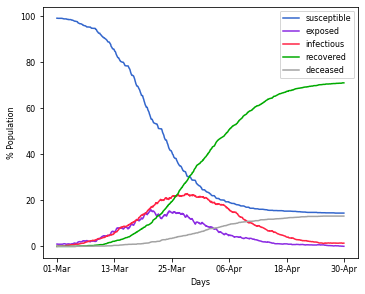

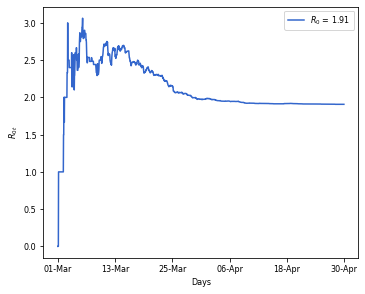

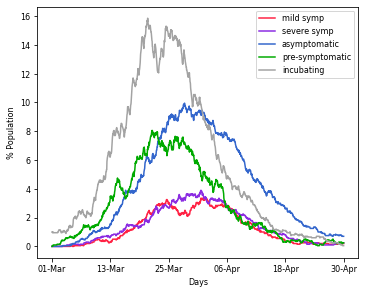

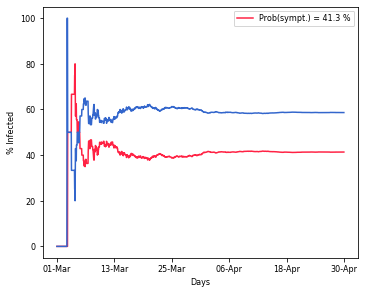

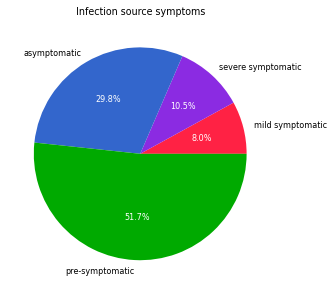

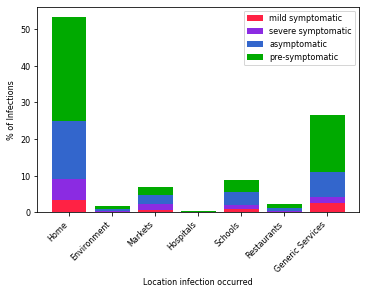

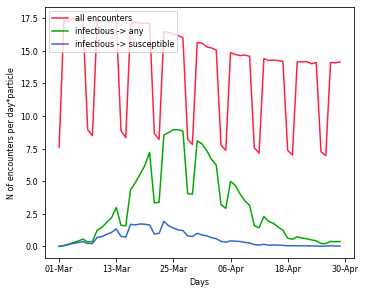

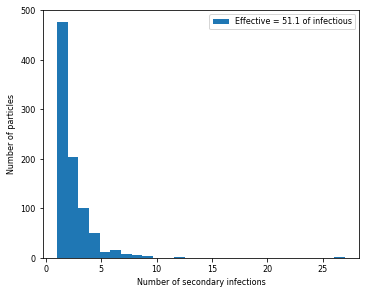

In [8]:
A = Analysis.from_comm(comm)
A.plot_SEIR()
A.plot_R()
A.plot_symptomatic_states()
A.plot_symptoms()
A.plot_inf_source_symptoms()
A.plot_infection_placement()
A.plot_encounters()
A.plot_secondary_infections_hist()
A.close()

### Saving Results

  The default saving method stores the community object into an hdf5 file with the command below. Data being stored is defaultly set, althought it can be customized. The sintax of the `save_hdf5` function can be check in the documentation.

In [9]:
tools.save_hdf5([comm], os.path.join('out', 'baseline.hdf5'))

### Loading Results

  The command below loads the community object from a data file. Such data can be used by the user by checking the sintax it was saved. For visualization porpuses, however, the hdf5 file can be loaded directly from the `plots` object. Function `plots.from_hdf5` prompts the user for an hdf5 file, and loads it in a manner that the plots can be made as if a community object had been loaded. See documentation for details.

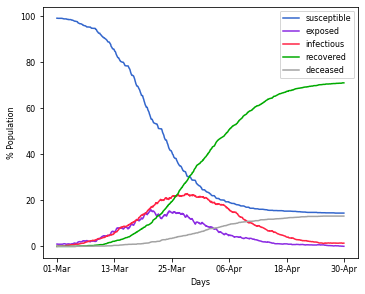

In [10]:
data, filename = tools.load_hdf5(os.path.join('out', 'baseline.hdf5'))
A = Analysis.from_hdf5(os.path.join('out', 'baseline.hdf5'))
A.plot_SEIR()
A.plot_close()